### This file plots the processed csv files with matplotlib

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [26]:
date = '2018-12-06_10h49'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/' + date + '/'



## Throughput plot for read and write loads

In [27]:
# read data into pandas dataframe
df_w = pd.read_csv(base_path + 'two_servers_mem_tp.csv')
df_w = df_w[df_w['client']<=80]
df_w

,client,write_tp_mean,write_tp_std,read_tp_mean,read_tp_std
0,2,2140.513333,50.433894,2143.086667,38.175423
1,8,5565.743333,174.837314,5524.366667,126.239626
2,16,5727.163333,15.887442,5650.313333,59.415643
3,32,5743.736667,122.324099,5701.416667,56.056995
4,48,5675.246667,100.239442,5684.263333,61.573857
5,64,5693.510000,107.210951,5700.650000,46.246425
6,80,5670.623333,104.179909,5709.810000,17.931181


In [28]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

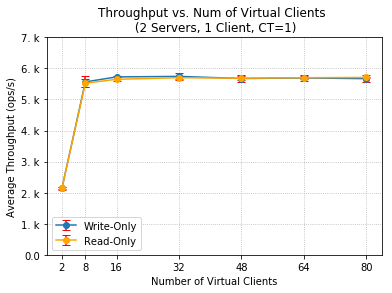

In [29]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (2 Servers, 1 Client, CT=1)")

vcs = df_w['client']

# write-only
tps = df_w['write_tp_mean']
std = df_w['write_tp_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Write-Only", capsize = 4, ecolor='r', marker='o')

# read-only
tps = df_w['read_tp_mean']
std = df_w['read_tp_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Read-Only", capsize = 4, ecolor='r', marker='o', color='orange')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=7000)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/"+date+"/two_servers_mem_tp.png", dpi = 150)

## Response-time plot for read and write loads

In [30]:
# read data into pandas dataframe
df_r = pd.read_csv(base_path + 'two_servers_mem_rt.csv')
df_r = df_r[df_r['client']<=80]
df_r

,client,write_rt_mean,write_rt_std,read_rt_mean,read_rt_std
0,2,0.945000,0.024833,0.931667,0.020950
1,8,1.453333,0.043269,1.440000,0.032404
2,16,2.875000,0.017795,2.820000,0.025495
3,32,5.620000,0.090921,5.653333,0.020548
4,48,8.441667,0.129893,8.446667,0.106171
5,64,11.251667,0.202663,11.220000,0.091196
6,80,14.118333,0.258242,14.003333,0.045886


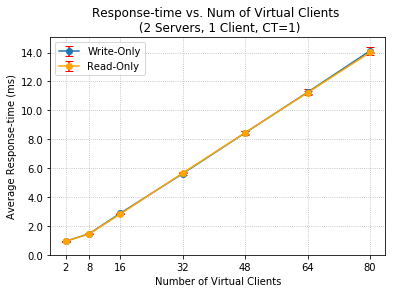

In [31]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (2 Servers, 1 Client, CT=1)")

vcs = df_r['client']

# write-only
tps = df_r['write_rt_mean']
std = df_r['write_rt_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Write-Only", capsize = 4, ecolor='r', marker='o')

# read-only
tps = df_r['read_rt_mean']
std = df_r['read_rt_std']
plt.errorbar(x = vcs, y = tps, yerr = std, label = "Read-Only", capsize = 4, ecolor='r', marker='o', color='orange')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/"+date+"/two_servers_mem_rt.png", dpi = 150)